In [1]:
def moment_invariants(img):    
    m_=cv2.moments(img)
    hu = cv2.HuMoments(m_)
    # 标准化Hu不变矩
    hu = np.abs(hu)
    hu = np.log(hu)
    hu = np.abs(hu)
    return hu

In [2]:
def combine_images(picLists,axis=None,explain=False,fontSize=12):
    '''
    将图像合并为一个图片，并可以为图像添加文字说明
    :param picLists:[图像说明,图像](图像成员的维数必须相同)
    :param axis:合并方向。
    axis=None 按照图片的形状，自动选择合并方向
    axis=0时，图像垂直合并;
    axis = 1 时， 图像水平合并。
    :param explain:是否添加文字说明的标记
    :param fontSize:文字大小
    :return:合并后的图像
    '''
    if explain:
        images=[]
        font = cv2.FONT_HERSHEY_SIMPLEX  # 使用默认字体
        for i in range(len(picLists)):
            images.append(cv2.putText(picLists[i][1], picLists[i][0], (5, 25), font, fontSize, (255,255, 255),2))
        ndim = picLists[0][1].ndim
    else:   #无文字说明
        images=picLists
        ndim = picLists[0].ndim
    shapes = np.array([mat.shape for mat in images])
    assert np.all(map(lambda e: len(e) == ndim, shapes)), 'all picLists should be same ndim.'
    if axis is None:
        if shapes[0, 0] < shapes[0, 1]:  # 根据图像的长宽比决定是合并方向，让合并后图像尽量是方形
            axis = 0
        else:
            axis = 1
    if axis == 0:  # 垂直方向合并图像
        cols = np.max(shapes[:, 1])
        # 扩展各图像 cols大小，使得 cols一致
        copy_imgs = [cv2.copyMakeBorder(img, 0, 0, 0, cols - img.shape[1],
                                        cv2.BORDER_CONSTANT, (0, 0, 0)) for img in images]
        # 垂直方向合并
        return np.vstack(copy_imgs)
    else:  # 水平方向合并图像
        rows = np.max(shapes[:, 0])
        # 扩展各图像rows大小，使得 rows一致
        copy_imgs = [cv2.copyMakeBorder(img, 0, rows - img.shape[0], 0, 0,
                                        cv2.BORDER_CONSTANT, (0, 0, 0)) for img in images]
        # 水平方向合并
        return np.hstack(copy_imgs)

original	6.55	16.95	24.88	25.23	52.37	36.78	50.30	
rotate-45	6.62	16.89	25.19	25.86	51.87	37.10	51.62	
translation	6.63	16.94	23.57	23.99	48.80	32.46	47.84	
rotate-90	6.55	16.95	24.88	25.23	52.37	36.78	50.30	
rotate-180	6.55	16.95	24.88	25.23	52.37	36.78	50.30	
shrink  	6.55	16.96	24.89	25.24	52.32	36.87	50.31	
rotate-270	6.55	16.95	24.88	25.23	52.37	36.78	50.30	


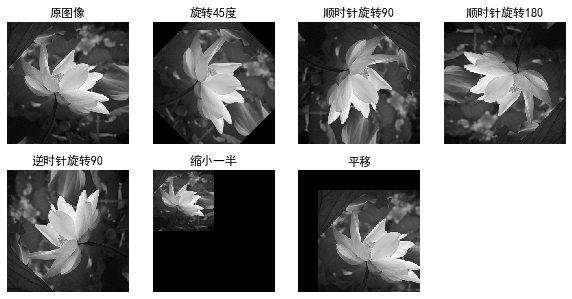

In [3]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
%matplotlib inline
%config InlinBackend.figure_format="retina"
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负

img0 = cv2.imread(r'..\img\lotus.jpg',0)
img=img0.copy()
textLists=[]  #用来存放几何变换名称
imgLists=[]   #用来存放几何变换图像
textLists.append("original")
imgLists.append(img)
# 旋转45度
rotate_45_matrix = cv2.getRotationMatrix2D((img.shape[1] // 2, img.shape[0] // 2), -45, 1)
rotate_45_image = cv2.warpAffine(img, rotate_45_matrix, dsize=(img.shape[1], img.shape[0]))
textLists.append("rotate-45")
imgLists.append(rotate_45_image)
# 平移
img=img0.copy()
M = np.float32([[1, 0, 50], [0, 1, 50]])
translation_img = cv2.warpAffine(img, M, dsize=(img.shape[1], img.shape[0]))
textLists.append("translation")
imgLists.append(translation_img)
# 顺时针旋转90
img=img0.copy()
rotate_90_iamge = cv2.rotate(img, rotateCode=cv2.ROTATE_90_CLOCKWISE)
textLists.append("rotate-90")
imgLists.append(rotate_90_iamge)
# 顺时针旋转180
img=img0.copy()
rotate_180_iamge = cv2.rotate(img, cv2.ROTATE_180)
textLists.append("rotate-180")
imgLists.append(rotate_180_iamge)
# 缩小一半
img=img0.copy()
resize_0_5_img=np.zeros(img.shape)
halfImg = cv2.resize(img, (img.shape[1] // 2, img.shape[0] // 2))
resize_0_5_img[0:halfImg.shape[0],0:halfImg.shape[1]]=halfImg
textLists.append("shrink  ")
imgLists.append(halfImg)
# 逆时针旋转90
img=img0.copy()
rotate_270_image = cv2.rotate(img, rotateCode=cv2.ROTATE_90_COUNTERCLOCKWISE)
textLists.append("rotate-270")
imgLists.append(rotate_270_image)

huMomentLists=[]
for img in imgLists:
    hu=moment_invariants(img)
    huMomentLists.append(np.array(hu))
    
for descipStr,hu in zip(textLists,huMomentLists):
    descipStr+="\t"
    for mm in hu:
        descipStr+="%0.2f"%mm+'\t'
    print(descipStr)

plt.figure(figsize=(10,5))
plt.subplot(241)
plt.imshow(img0,cmap="gray")
plt.title("原图像")
plt.axis("off")
plt.subplot(242)
plt.imshow(rotate_45_image,cmap="gray")
plt.title("旋转45度")
plt.axis("off")
plt.subplot(243)
plt.imshow(rotate_90_iamge,cmap="gray")
plt.title("顺时针旋转90")
plt.axis("off")
plt.subplot(244)
plt.imshow(rotate_180_iamge,cmap="gray")
plt.title("顺时针旋转180")
plt.axis("off")
plt.subplot(245)
plt.imshow(rotate_270_image,cmap="gray")
plt.title("逆时针旋转90")
plt.axis("off")
plt.subplot(246)
plt.imshow(resize_0_5_img,cmap="gray")
plt.title("缩小一半")
plt.axis("off")

plt.subplot(247)
plt.imshow(translation_img,cmap="gray")
plt.title("平移")
plt.axis("off")
plt.show()
